In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from itertools import combinations
from sklearn.base import clone, ClassifierMixin, BaseEstimator
from sklearn.metrics import confusion_matrix, make_scorer, f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc, roc_auc_score
from scipy import interp
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [3]:
#Creazione del Dataset e scaling del Dataset

In [4]:
df_magic = pd.read_csv('magic04.data', header = None)

In [5]:
df_magic
df_magic.columns = ['Lenght', 'Width', 'Size', 'Conc', 'Conc1', 'Asym', 'M3Long', 'M3Trans', 'Alpha', 'Dist', 'Class']
df_magic

,Lenght,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [6]:
le = LabelEncoder()
y = le.fit_transform(df_magic['Class'].values)
df_magic['Class'] = y

In [7]:
df_magic

,Lenght,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [8]:
X,y  = df_magic.iloc[:,:-1].values, df_magic.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 0, stratify= y)

X_train = X_train[:100]
y_train = y_train[:100]
X_test = X_test[:100]
y_test = y_test[:100]

In [9]:
#Funzioni

In [10]:
def ROC_Curve(X,y, estimator):
    cv = list(StratifiedKFold(n_splits  = 10, random_state = 1, shuffle= True).split(X, y))
    fig  = plt.figure(figsize = (7,5))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0,1,100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas = estimator.fit(X[train], y[train]).predict_proba(X_train[test])
        fpr, tpr, thresholds = roc_curve(y[test], probas[:,1],pos_label= 1)
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr,tpr)
        plt.plot(fpr,tpr, label = 'ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    plt.plot([0,1], [0,1], linestyle = '--', color = (0.6,0.6,0.6), label = 'Random guessing')
    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--', label = 'Mean ROC (area = %0.2f)' % mean_auc, lw = 2)
    plt.plot([0,0,1], [0,1,1], linestyle = ':', label = 'Perfect performance')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc = 'lower right')
    plt.show()

In [11]:
class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X,y):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train,y_train, X_test, y_test,self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r = dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)

                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self,X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score 

In [12]:
class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    #Abbiamo utilizzato due classi come genitori per avere alcune funzionalità a gratis
    def __init__(self, classifiers, vote = 'classlabel', weights = None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote 
        self.weights = weights
    
    def fit(self, X,y):
        if self.vote not in {'probability', 'classlabel'}:
            raise ValueError('vote must be probability or class label')
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal')
        self.labelenc_ = LabelEncoder()
        self.labelenc_.fit(y) #qui semplicemente le fitta nel senso trova le singole classi
        self.classes_ = self.labelenc_.classes_ #qua le restituisce sotto  forma di arrat
        self.classifiers_ = []

        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.labelenc_.transform(y)) #qua le trasforma in numeir interi da 0 
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis = 1)
        else: 

            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            #print(predictions)
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights = self.weights)), axis =1, arr = predictions)
            #print(maj_vote)
        maj_vote = self.labelenc_.inverse_transform(maj_vote)
        #print(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis = 0, weights= self.weights)
        return avg_proba
    
    def get_params(self, deep = True):
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep = False)
        else: 
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep = True).items():
                    out['%s_%s' % (name,key)] =value
        return out

In [13]:
scorer_f1 = make_scorer(f1_score, pos_label = 0)

In [14]:
#Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
# SUPPORT VECTOR MACHINE with scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.base import clone


In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
#Creazione del classificatore
clf = SVC(kernel="rbf", C=1, gamma=0.1, probability = True) #perché C 1 e gamma 0.1, mistero

pipe_clf = make_pipeline(StandardScaler(), clf)
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
gamma = [0.1,1,10]
param_grid_clf = [{'svc__C': C_range, 'svc__gamma':gamma, 'svc__kernel':['rbf']}, 
{'svc__C': C_range, 'svc__gamma':gamma, 'svc__kernel': ['linear']}]
#Addestramento del Classificatore
#valeria clf.fit(X_train_std, y_train)

# Calcolo accuratezza
gs_clf_acc = GridSearchCV(estimator= pipe_clf, param_grid= param_grid_clf, scoring= 'accuracy', refit= True, cv = 10, n_jobs= -1)
gs_clf_acc.fit(X_train, y_train)
best_clf_acc = gs_clf_acc.best_estimator_
print(gs_clf_acc.best_params_)
best_clf_acc.fit(X_train, y_train)
scores = cross_val_score(estimator= best_clf_acc, X = X_train, y = y_train, cv =10)
print('Cross validation accuracy: ', np.mean(scores), gs_clf_acc.best_score_)
print('Accuracy del modello sul test data:', best_clf_acc.score(X_test, y_test))
print('Accuracy del modello sul train:', best_clf_acc.score(X_train, y_train))


{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Cross validation accuracy:  0.86 0.86
Accuracy del modello sul test data: 0.83
Accuracy del modello sul train: 0.91


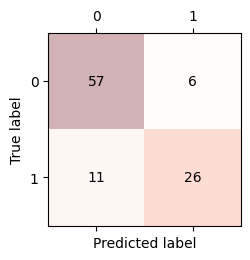

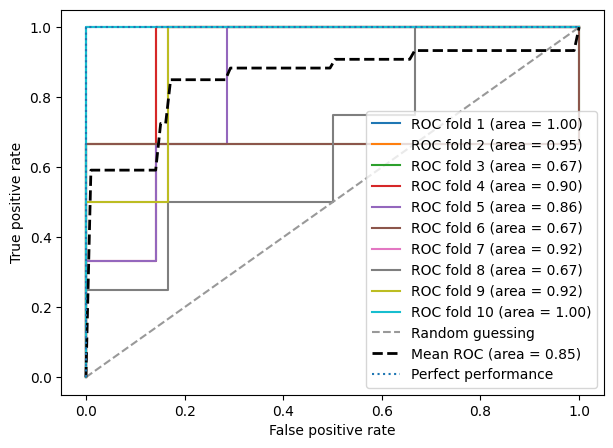

ROC auc score with accuracy 0.882024882024882


In [18]:
confmat = confusion_matrix(y_true = y_test, y_pred = best_clf_acc.predict(X_test))
fig, ax = plt.subplots(figsize = (2.5,2.5))
ax.matshow(confmat, cmap = plt.cm.Reds, alpha =0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x= j, y= i, s= confmat[i,j], va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

ROC_Curve(X_train, y_train, best_clf_acc)
print('ROC auc score with accuracy', roc_auc_score(y_true= y_test, y_score= best_clf_acc.predict_proba(X_test)[:,1]))


In [19]:
#f1 validation
gs_clf_f1 = GridSearchCV(estimator= pipe_clf, param_grid= param_grid_clf, scoring= scorer_f1, refit= True, cv = 10, n_jobs= -1)
gs_clf_f1.fit(X_train, y_train)
best_clf_f1 = gs_clf_f1.best_estimator_
best_clf_f1.fit(X_train, y_train)
print('I migliori parametri sono:',gs_clf_f1.best_params_)
#valuto lo score con la cross validation ossia lo score ottenuto sul validation dataset con quei valori degli iperparametri scelti.
scores = cross_val_score(estimator= best_clf_f1, X = X_train, y = y_train, cv =10, scoring= scorer_f1)
#print('Cross validation f1_score: ', np.mean(scores), gs_lr_f1.best_score_)
#print('F1 score del modello sul test data:', scorer_f1(best_lr_f1, X= X_test,y_true= y_test))
#print('F1 score del modello sul train:', scorer_f1(best_lr_f1, X= X_train,y_true= y_train))

I migliori parametri sono: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [20]:
#GRID search e Cross validation

In [21]:
from sklearn.model_selection import GridSearchCV

# Creazione della griglia di iperparametri
param_grid = [{'kernel': ['rbf'], 'C': [0.01,0.1,1], 'gamma': [0.1,1,10]}]

# Numero di fold per la Cross-validation
n_folds = 3

# Creazione di un oggetto di tipo GridSearchCV
grid_search_cv = GridSearchCV(clf, param_grid, cv=n_folds)

# Esecuzione della ricerca degli iperparametri 
grid_search_cv.fit(X_train, y_train)

# Stampa risultati
print('Combinazioni di parametri:\n', grid_search_cv.cv_results_['params'])
print('Accuratezza media per combinazione:\n', grid_search_cv.cv_results_['mean_test_score'])
print('Combinazione migliore:\n', grid_search_cv.best_params_)
print('Accuratezza media della combinazione migliore: %.3f' % grid_search_cv.best_score_)

Combinazioni di parametri:
 [{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}, {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 10, 'kernel': 'rbf'}]
Accuratezza media per combinazione:
 [0.66013072 0.66013072 0.66013072 0.66013072 0.66013072 0.66013072
 0.66013072 0.66013072 0.66013072]
Combinazione migliore:
 {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Accuratezza media della combinazione migliore: 0.660


In [22]:
#feature selection : SBS

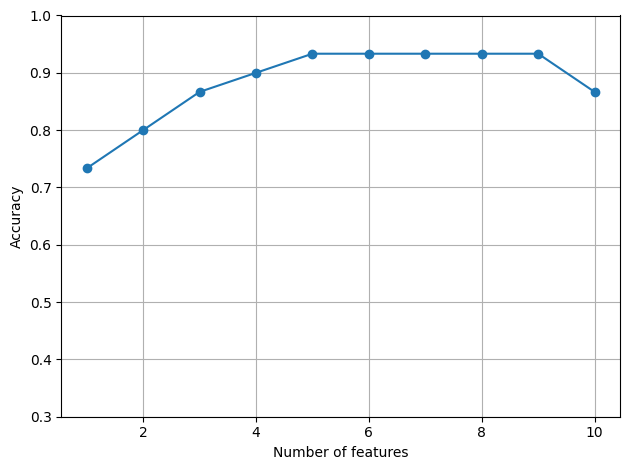

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
sbs = SBS(clf, k_features= 1)
sbs.fit(X_train_std, y_train)
k_feat  = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.3,1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
sbs = SBS(clf, k_features = 6)


In [25]:
from sklearn.pipeline import make_pipeline

pipe_clf_sbs = make_pipeline(StandardScaler(), sbs, clf)
#n_components = [6,7]
#C_range = [0.1,1,10]
#param_grid_clf_sbs = [{'C': [1], 'gamma': [0.1], 'sequentialfeatureselector__n_features_to_select': n_components}]
param_grid_clf_sbs = [{'svc__C': [0.01,0.1,1], 'svc__gamma': [0.1, 1, 10]}]

gs_clf_sbs = GridSearchCV(estimator = pipe_clf_sbs, param_grid = param_grid_clf_sbs, cv=10, refit = True)
gs_clf_sbs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sbs',
                                        <__main__.SBS object at 0x1221bd100>),
                                       ('svc',
                                        SVC(C=1, gamma=0.1,
                                            probability=True))]),
             param_grid=[{'svc__C': [0.01, 0.1, 1],
                          'svc__gamma': [0.1, 1, 10]}])

In [26]:
best_clf_sbs_acc = gs_clf_sbs.best_estimator_
best_clf_sbs_acc.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sbs', <__main__.SBS object at 0x121f6f4d0>),
                ('svc', SVC(C=1, gamma=0.1, probability=True))])>

In [27]:
print('La accuracy del best classificatore:', best_clf_sbs_acc)
best_clf_sbs_acc.fit(X_train, y_train)

La accuracy del best classificatore: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sbs', <__main__.SBS object at 0x121f6f4d0>),
                ('svc', SVC(C=1, gamma=0.1, probability=True))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sbs', <__main__.SBS object at 0x121f6f4d0>),
                ('svc', SVC(C=1, gamma=0.1, probability=True))])

In [28]:
# Cross validation
cv_score = cross_val_score(estimator = best_clf_sbs_acc, X= X_train, y= y_train, cv=n_folds)
print('CV accuracy score:', np.mean(cv_score))
print('Accuracy sul test data: ', best_clf_sbs_acc.score(X_test, y_test))
print('Accuracy sul train data: ', best_clf_sbs_acc.score(X_train, y_train))

CV accuracy score: 0.810754604872252
Accuracy sul test data:  0.8
Accuracy sul train data:  0.88


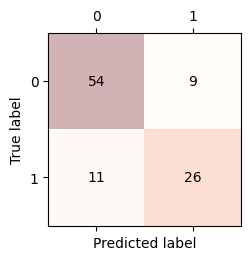

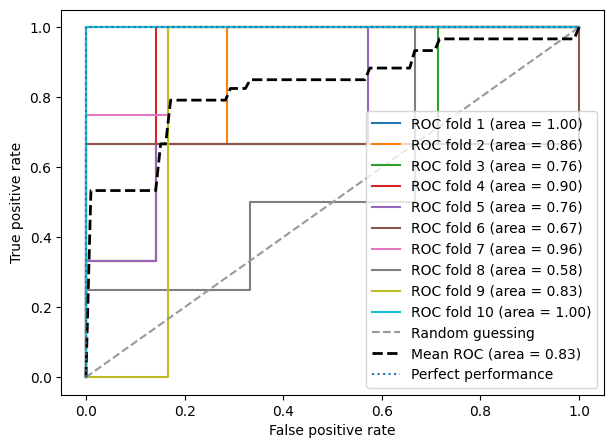

ROC auc score with accuracy 0.8721578721578722


In [47]:
confmat = confusion_matrix(y_true = y_test, y_pred = best_clf_sbs_acc.predict(X_test))
fig, ax = plt.subplots(figsize = (2.5,2.5))
ax.matshow(confmat, cmap = plt.cm.Reds, alpha =0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x= j, y= i, s= confmat[i,j], va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

ROC_Curve(X_train, y_train, best_clf_sbs_acc)
print('ROC auc score with accuracy', roc_auc_score(y_true = y_test, y_score= best_clf_sbs_acc.predict_proba(X_test)[:,1]))


In [50]:
sbs_5 = SBS(clf, k_features = 5)
pipe_clf_sbs_acc = make_pipeline(StandardScaler(), sbs_5, clf)
gs_clf_sbs_acc = GridSearchCV(estimator= pipe_clf_sbs_acc, param_grid = param_grid_clf_sbs, scoring = 'accuracy', cv  = 10, n_jobs= -1)
gs_clf_sbs_acc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sbs',
                                        <__main__.SBS object at 0x1244db080>),
                                       ('svc',
                                        SVC(C=1, gamma=0.1,
                                            probability=True))]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.01, 0.1, 1],
                          'svc__gamma': [0.1, 1, 10]}],
             scoring='accuracy')

In [52]:
pipe_clf_sbs_f1 = make_pipeline(StandardScaler(), sbs_5, clf)
gs_clf_sbs_f1 = GridSearchCV(estimator= pipe_clf_sbs_f1, param_grid = param_grid_clf_sbs, scoring = scorer_f1, cv  = 10, n_jobs= -1)
gs_clf_sbs_f1.fit(X_train, y_train)
#forest.fit(X_train[:,k5], y_train)
best_clf_sbs_f1 = gs_clf_sbs_f1.best_estimator_
best_clf_sbs_f1.fit(X_train, y_train)
print(gs_clf_sbs_f1.best_params_)
scores = cross_val_score(estimator= best_clf_sbs_f1, X= X_train, y = y_train, cv = 10, scoring= scorer_f1)
print('CV accuracy:', np.mean(scores), gs_clf_sbs_f1.best_score_)
print('Accuracy on test data:', scorer_f1(best_clf_sbs_f1, X_test, y_test))
print('Accuracy on train data:', scorer_f1(best_clf_sbs_f1, X_train, y_train))


{'svc__C': 1, 'svc__gamma': 0.1}
CV accuracy: 0.9121153846153847 0.9121153846153847
Accuracy on test data: 0.84375
Accuracy on train data: 0.9219858156028369


In [29]:
#FEATURE EXTRACTION: svm + PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train_std, y_train, test_size = 0.3, random_state = 0, stratify = y_train)
pca.fit(X_train_2)


PCA()

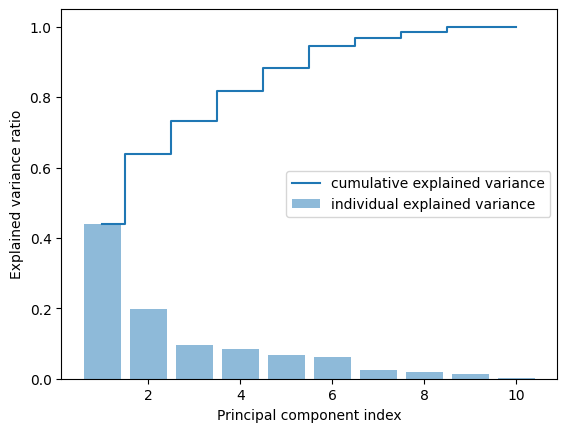

In [31]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,11), pca.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,11), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()

In [32]:
n_components = [5,6,7]
C_range = [0.1,1,10]
pipe_clf_pca = make_pipeline(StandardScaler(), pca, clf)
param_grid_clf_pca = [{'svc__C': C_range, 'svc__gamma': [0.1,1,10], 'pca__n_components': n_components, 'svc__kernel':['rbf']},{'svc__C': C_range, 'svc__gamma':[0.1,1,10], 
'pca__n_components': n_components, 'svc__kernel': ['linear']} ]
#param_grid_clf_pca = [{'svc__C': C_range, 'svc__gamma': [0.1,1,10], 'pca__n_components': n_components, 'svc__kernel':['RBF']}]
#accuracy
gs_clf_pca_acc = GridSearchCV(estimator = pipe_clf_pca, param_grid = param_grid_clf_pca, cv=10, scoring = 'accuracy', refit = True)
gs_clf_pca_acc.fit(X_train, y_train)
best_clf_pca_acc =gs_clf_pca_acc.best_estimator_
best_clf_pca_acc.fit(X_train, y_train)
print('I migliori parametri sono:', gs_clf_pca_acc.best_params_)

I migliori parametri sono: {'pca__n_components': 6, 'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [33]:
#ottenuti questi "iperparametri", li confronto con lo score ottenuto sul validation dataset
#attraverso il cross validation

In [34]:
scores = cross_val_score(estimator = best_clf_pca_acc, X = X_train, y= y_train, cv =10)
print('Cross validation accuracy:', np.mean(scores), gs_clf_pca_acc.best_score_)
print('Accuracy del modello sul test data:', best_clf_pca_acc.score(X_test, y_test))
print('Accuracy del modello sul train data:', best_clf_pca_acc.score(X_train, y_train))

Cross validation accuracy: 0.8300000000000001 0.8300000000000001
Accuracy del modello sul test data: 0.81
Accuracy del modello sul train data: 0.89


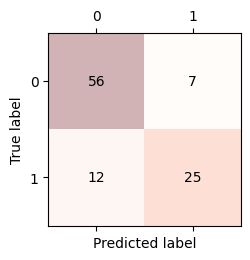

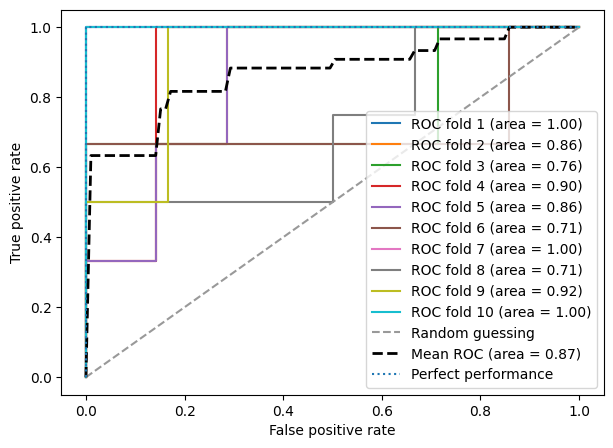

ROC auc score with accuracy 0.8704418704418704


In [35]:
confmat = confusion_matrix(y_true = y_test, y_pred = best_clf_pca_acc.predict(X_test))
fig, ax = plt.subplots(figsize = (2.5,2.5))
ax.matshow(confmat, cmap = plt.cm.Reds, alpha =0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x= j, y= i, s= confmat[i,j], va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

ROC_Curve(X_train, y_train, best_clf_pca_acc)
print('ROC auc score with accuracy', roc_auc_score(y_true= y_test, y_score= best_clf_pca_acc.predict_proba(X_test)[:,1]))


In [41]:
gs_clf_pca_f1 = GridSearchCV(estimator= pipe_clf_pca, param_grid= param_grid_clf_pca, cv = 10, scoring= scorer_f1, n_jobs= -1)
gs_clf_pca_f1.fit(X_train, y_train)
best_clf_pca_f1 = gs_clf_pca_f1.best_estimator_
best_clf_pca_f1.fit(X_train, y_train)
print('I migliori parametri sono:',gs_clf_pca_f1.best_params_)
scores = cross_val_score(estimator= best_clf_pca_f1, X= X_train, y = y_train, cv = 10, scoring= scorer_f1)
print('CV accuracy:', np.mean(scores), gs_clf_pca_f1.best_score_)
print('Accuracy on test data:', scorer_f1(best_clf_pca_f1, X_test, y_test))
print('Accuracy on train data:', scorer_f1(best_clf_pca_f1, X_train, y_train))

I migliori parametri sono: {'pca__n_components': 6, 'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
CV accuracy: 0.8864285714285716 0.8864285714285716
Accuracy on test data: 0.8549618320610687
Accuracy on train data: 0.923076923076923


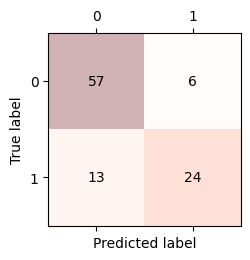

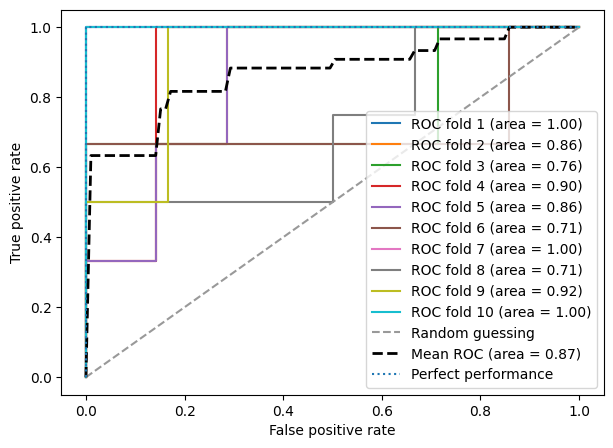

ROC auc score with accuracy 0.8704418704418704


In [46]:
confmat = confusion_matrix(y_true = y_test, y_pred = best_clf_pca_f1.predict(X_test))
fig, ax = plt.subplots(figsize = (2.5,2.5))
ax.matshow(confmat, cmap = plt.cm.Reds, alpha =0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x= j, y= i, s= confmat[i,j], va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

ROC_Curve(X_train, y_train, best_clf_pca_f1)
print('ROC auc score with accuracy', roc_auc_score(y_true = y_test, y_score= best_clf_pca_f1.predict_proba(X_test)[:,1]))


In [36]:
#SVM + KPCA

In [42]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel = 'rbf')
pipe_clf_kpca = make_pipeline(StandardScaler(), kpca, clf)
param_grid_clf_kpca = [{'svc__C': C_range, 'svc__gamma': [0.1,1,10], 'kernelpca__n_components': n_components, 'svc__kernel':['rbf']},{'svc__C': C_range, 'svc__gamma':[0.1,1,10], 
'kernelpca__n_components': n_components, 'svc__kernel': ['linear']} ]
#accuracy
gs_clf_kpca_acc = GridSearchCV(estimator = pipe_clf_kpca, param_grid = param_grid_clf_kpca, cv=10, scoring = 'accuracy', n_jobs = -1)
gs_clf_kpca_acc.fit(X_train, y_train)
best_clf_kpca_acc =gs_clf_kpca_acc.best_estimator_
best_clf_kpca_acc.fit(X_train, y_train)
print('I migliori parametri sono:', gs_clf_kpca_acc.best_params_)


I migliori parametri sono: {'kernelpca__n_components': 7, 'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}


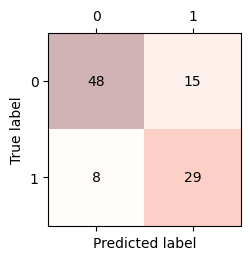

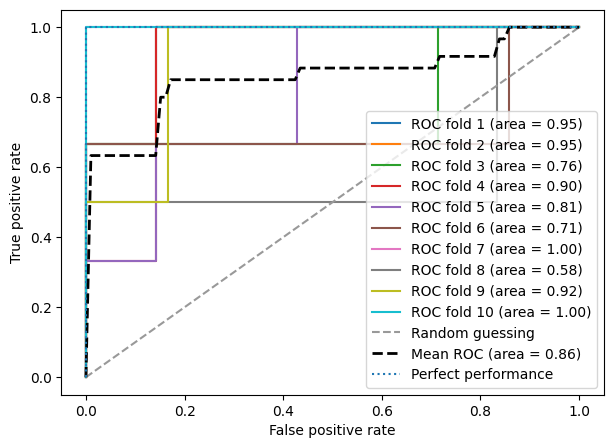

ROC auc score with accuracy 0.8386958386958387


In [43]:
confmat = confusion_matrix(y_true = y_test, y_pred = best_clf_kpca_acc.predict(X_test))
fig, ax = plt.subplots(figsize = (2.5,2.5))
ax.matshow(confmat, cmap = plt.cm.Reds, alpha =0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x= j, y= i, s= confmat[i,j], va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

ROC_Curve(X_train, y_train, best_clf_kpca_acc)
print('ROC auc score with accuracy', roc_auc_score(y_true = y_test, y_score= best_clf_kpca_acc.predict_proba(X_test)[:,1]))


In [44]:
gs_clf_kpca_f1 = GridSearchCV(estimator= pipe_clf_kpca, param_grid= param_grid_clf_kpca, cv = 10, scoring= scorer_f1, n_jobs= -1)
gs_clf_kpca_f1.fit(X_train, y_train)
best_clf_kpca_f1 = gs_clf_kpca_f1.best_estimator_
best_clf_kpca_f1.fit(X_train, y_train)
print(gs_clf_kpca_f1.best_params_)
scores = cross_val_score(estimator= best_clf_kpca_f1, X= X_train, y = y_train, cv = 10, scoring= scorer_f1)
print('CV accuracy:', np.mean(scores), gs_clf_kpca_f1.best_score_)
print('Accuracy on test data:', scorer_f1(best_clf_kpca_f1, X_test, y_test))
print('Accuracy on train data:', scorer_f1(best_clf_kpca_f1, X_train, y_train))

{'kernelpca__n_components': 6, 'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
CV accuracy: 0.8911172161172163 0.8911172161172163
Accuracy on test data: 0.8217054263565892
Accuracy on train data: 0.9078014184397163


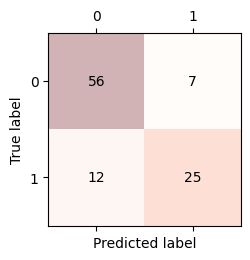

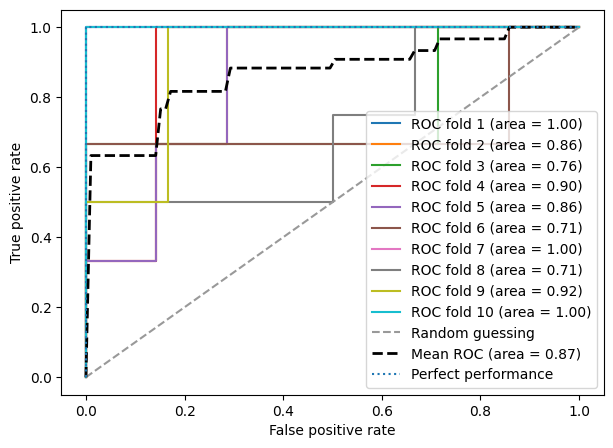

ROC auc score with accuracy 0.8704418704418704


In [45]:
confmat = confusion_matrix(y_true = y_test, y_pred = best_clf_pca_f1.predict(X_test))
fig, ax = plt.subplots(figsize = (2.5,2.5))
ax.matshow(confmat, cmap = plt.cm.Reds, alpha =0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x= j, y= i, s= confmat[i,j], va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

ROC_Curve(X_train, y_train, best_clf_pca_f1)
print('ROC auc score with accuracy', roc_auc_score(y_true = y_test, y_score= best_clf_pca_f1.predict_proba(X_test)[:,1]))
